# Практическое задание №1 по теме "Основы обучения нейронных сетей".

<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.</li>
    <li>Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?</li>
</ol>

**Как можно улучшить обучение?** 

* Изменить скорость обучения $\eta$
* Изменить количество эпох
* Изменить количество нейронов скрытого слоя
* Изменить количество скрытых слоев 

### Загрузка библиотек и объявление функций

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
def two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N, epochs_N, eta, seed):
    np.random.seed(seed)
    w0 = 2 * np.random.random((4, neurons_N)) - 1
    w1 = 2 * np.random.random((neurons_N, 3)) - 1
    errors = []
    errors_test = []
    for i in range(epochs_N):
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        layer2_error = y_train - layer2  
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T) 
        layer1_delta = layer1_error * sigmoid_deriv(layer1) 

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100  

        layer0_t = X_test
        layer1_t = sigmoid(np.dot(layer0_t, w0))
        layer2_t = sigmoid(np.dot(layer1_t, w1))
        layer2_error_t = y_test - layer2_t

        error_test = np.mean(np.abs(layer2_error_t))
        errors_test.append(error_test)
        accuracy_test = (1 - error_test) * 100

        w1 += layer1.T.dot(layer2_delta) * eta  
        w0 += layer0.T.dot(layer1_delta) * eta  
        
    plt.figure(figsize=(16, 6))
    plt.plot(errors, '-m', label='Train')
    plt.plot(errors_test, '-c', label='Test')
    plt.xlabel('Обучение (Эпохи)')
    plt.ylabel('Ошибка')
    plt.grid()
    plt.legend()
    plt.show()

    print("Точность нейронной сети на Train: " + str(round(accuracy,2)) + "%")
    print("Точность нейронной сети на Test: " + str(round(accuracy_test,2)) + "%")

In [4]:
def three_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N, epochs_N, eta, seed):
    np.random.seed(seed)
    w0 = 2*np.random.random((4, neurons_N)) - 1
    w1 = 2*np.random.random((neurons_N, neurons_N)) - 1
    w2 = 2*np.random.random((neurons_N, 3)) - 1
    errors = []
    errors_test = []
    for i in range(epochs_N):
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))
        
        layer3_error = y_train - layer3
        layer3_delta = layer3_error * sigmoid_deriv(layer3)
        
        layer2_error = layer3_delta.dot(w2.T) 
        layer2_delta = layer2_error * sigmoid_deriv(layer2) 
        
        layer1_error = layer2_delta.dot(w1.T) 
        layer1_delta = layer1_error * sigmoid_deriv(layer1) 

        error = np.mean(np.abs(layer3_error))
        errors.append(error)
        accuracy = (1 - error) * 100  

        layer0_t = X_test
        layer1_t = sigmoid(np.dot(layer0_t, w0))
        layer2_t = sigmoid(np.dot(layer1_t, w1))
        layer3_t = sigmoid(np.dot(layer2_t, w2))
        layer3_error_t = y_test - layer3_t

        error_test = np.mean(np.abs(layer3_error_t))
        errors_test.append(error_test)
        accuracy_test = (1 - error_test) * 100

        w2 += layer2.T.dot(layer3_delta) * eta
        w1 += layer1.T.dot(layer2_delta) * eta  
        w0 += layer0.T.dot(layer1_delta) * eta  
        
    plt.figure(figsize=(16, 6))
    plt.plot(errors, '-m', label='Train')
    plt.plot(errors_test, '-c', label='Test')
    plt.xlabel('Обучение (Эпохи)')
    plt.ylabel('Ошибка')
    plt.grid()
    plt.legend()
    plt.show()

    print("Точность нейронной сети на Train: " + str(round(accuracy,2)) + "%")
    print("Точность нейронной сети на Test: " + str(round(accuracy_test,2)) + "%")

### Подготовка данных

In [5]:
iris_data = pd.read_csv("../Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

In [7]:
# формирование выходных данных
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [8]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

### Обучение и оценка нейронной сети для сравнений 

Обучим модель по которой будет сравнивать улучшение/ухудшение качества в зависимости от изменяемых гиперпараметров. Используем не самые хорошие гиперпараметры, чтобы разница была более заметна.

In [9]:
# seed
np.random.seed(1)

# количество нейронов в скрытом слое
neuron_numb = 3

# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 5 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
eta = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# массив для ошибок (тестовые данные)
errors_test = [] 

# количество эпох
epoch_n = 10000

In [10]:
# процесс обучения
for i in range(epoch_n): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # Посчитали E - суммарная ошибка (L)
    layer2_delta = layer2_error * sigmoid_deriv(layer2) # Делаем производную по входу: e_k* delta_phi(s), s=sigmoid(l0*w0)
    
    # расчитаем с помощью производной по входу
    layer1_error = layer2_delta.dot(w1.T) # Находим ошибку первого слоя: e_k * delta_phi(s) * w1
    layer1_delta = layer1_error * sigmoid_deriv(layer1) # delta_w =  err_1(ошибка первого слоя) * delta_phi 
    
    # ошибка и точнсть на Train
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100 # это ошибка не совсем accuracy, так как accuracy - пороговая метрика!
    
    # прямое распространение(feed forward) для теста
    layer0_t = X_test
    layer1_t = sigmoid(np.dot(layer0_t, w0))
    layer2_t = sigmoid(np.dot(layer1_t, w1))
    layer2_error_t = y_test - layer2_t
    
    # ошибка и точнсть на Test
    error_test = np.mean(np.abs(layer2_error_t))
    errors_test.append(error_test)
    accuracy_test = (1 - error_test) * 100
    
    # корректировка весов
    w1 += layer1.T.dot(layer2_delta) * eta # delta_w1 = {err_2(ошибка первого слоя) * delta_phi} * вход (layer1)
    w0 += layer0.T.dot(layer1_delta) * eta # delta_w0 = {err_1(ошибка первого слоя) * delta_phi} * вход (layer0)

Результаты:

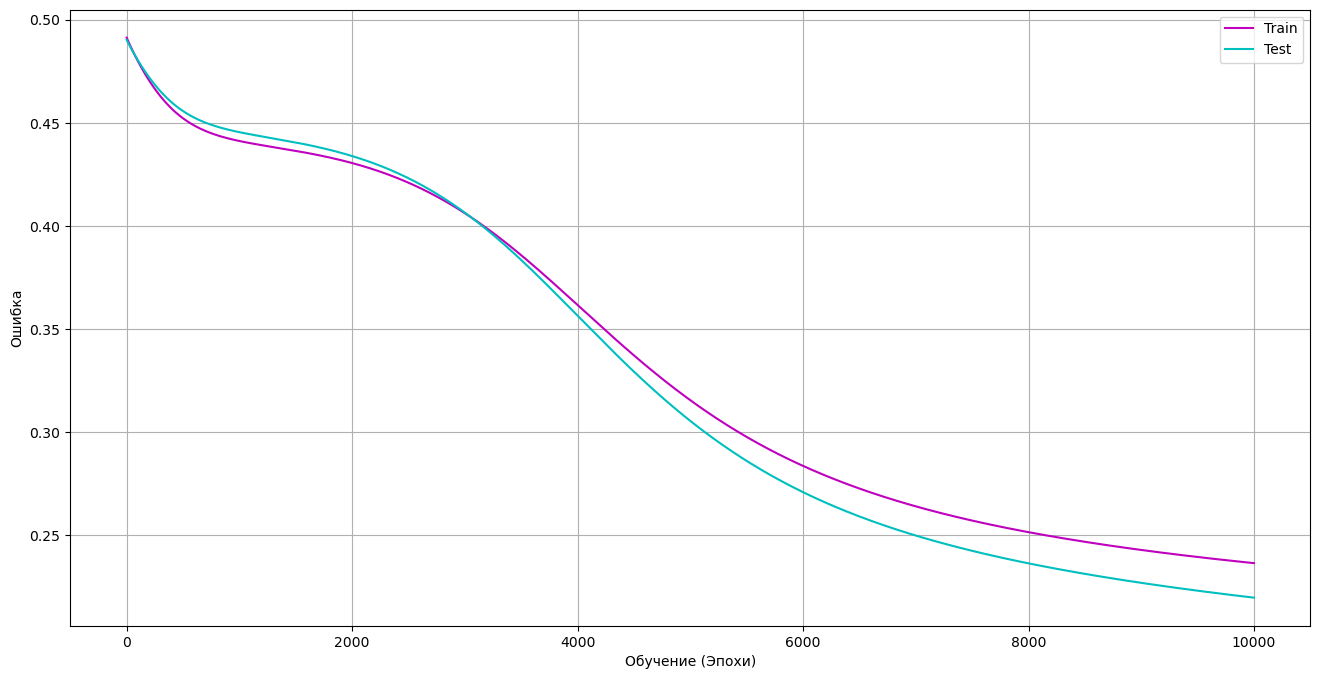

Точность нейронной сети на Train: 76.34%
Точность нейронной сети на Test: 78.02%


In [11]:
plt.figure(figsize = (16,8))
plt.plot(errors, '-m', label='Train')
plt.plot(errors_test, '-c', label='Test')
plt.xlabel('Обучение (Эпохи)')
plt.ylabel('Ошибка')
plt.grid()
plt.legend()
plt.show()
        
print("Точность нейронной сети на Train: " + str(round(accuracy,2)) + "%")
print("Точность нейронной сети на Test: " + str(round(accuracy_test,2)) + "%")

---

## 1. Изменение скорости обучения $\eta$

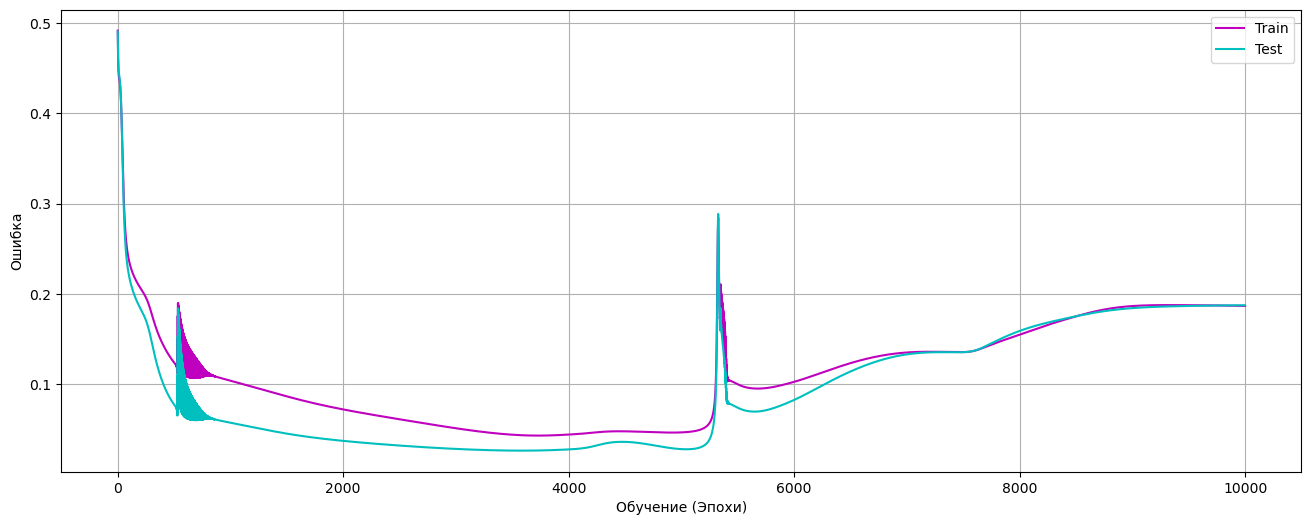

Точность нейронной сети на Train: 81.32%
Точность нейронной сети на Test: 81.25%


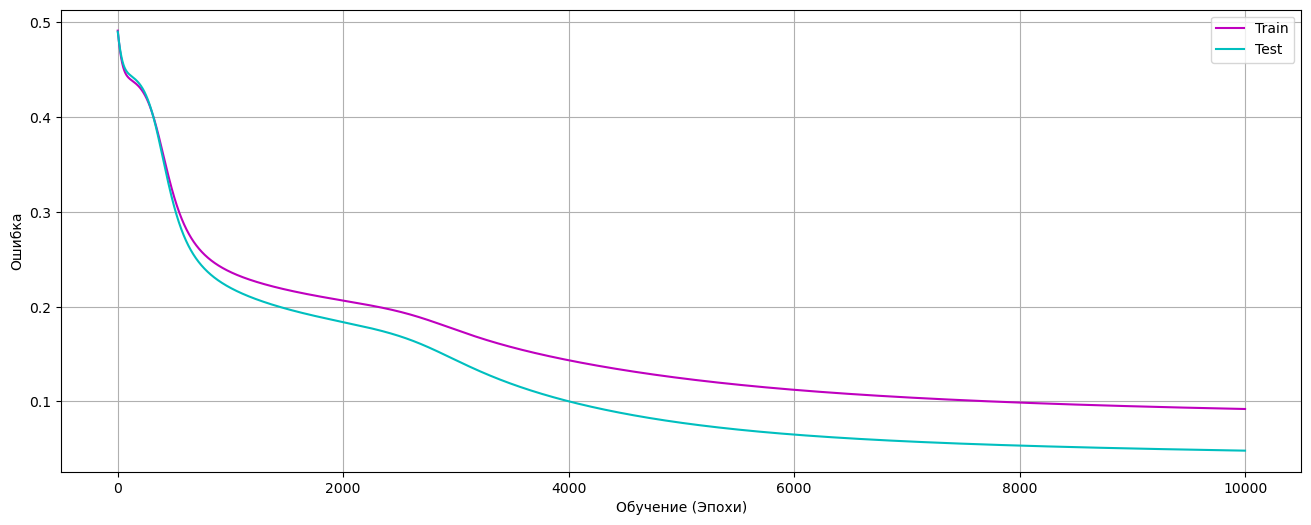

Точность нейронной сети на Train: 90.79%
Точность нейронной сети на Test: 95.19%


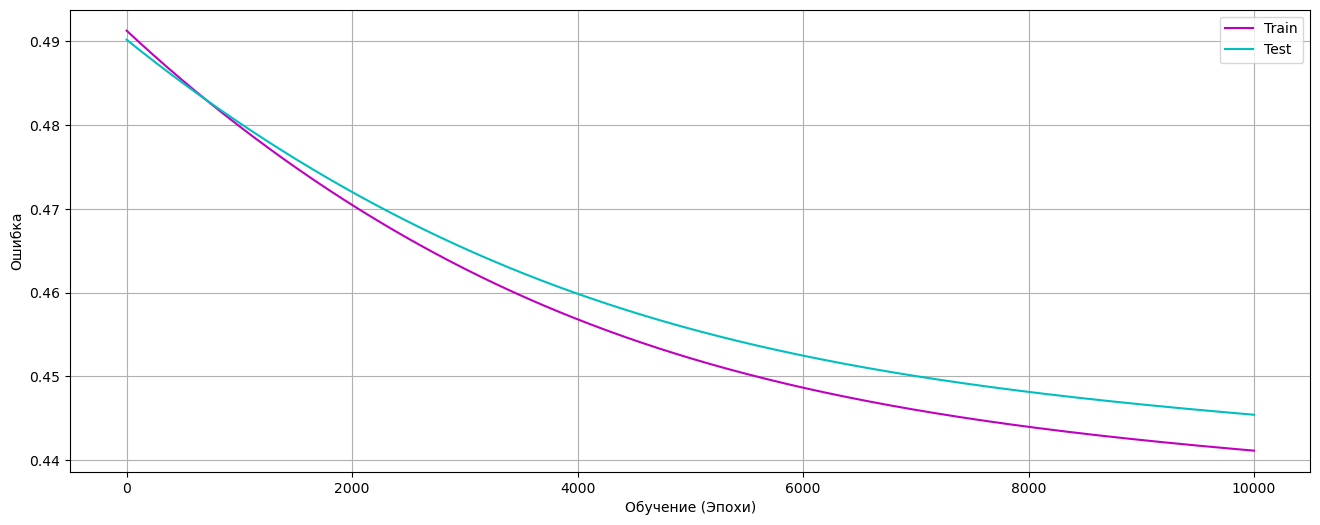

Точность нейронной сети на Train: 55.88%
Точность нейронной сети на Test: 55.46%


In [12]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.1, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.01, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.0001, seed=1)

Как видно из графиков слишком низкое значение $\eta$ может привести к сильному недообучению модели, поэтому можно сказать о некой зависимости параметров: скорость обучения и количество эпох. Чем ниже скорость обучения тем больше нужно эпох для схождения. Однако, при низкой скорости обучения можно попадать в "локальные минимумы", которые могут не являться "абсолютным минимум". Это онзачает, что мы можем не достичь более высокого результата.

Увеличив скорость обучения $\eta$ удалось улучшить качество сети по сравнению с начальной нейронной сетью.

## 2. Изменение количества эпох

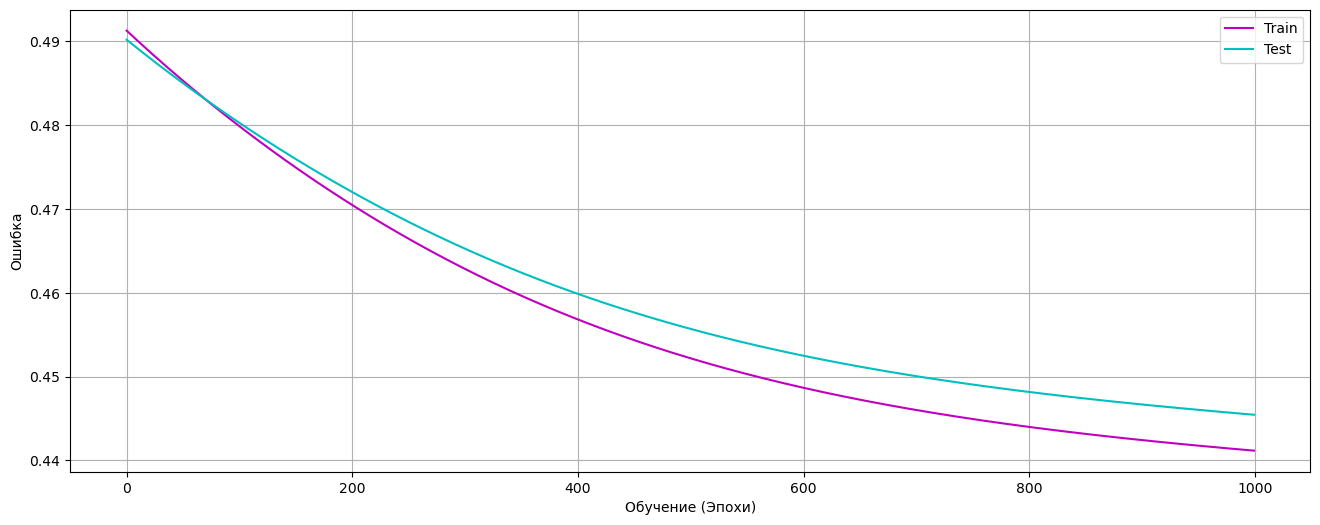

Точность нейронной сети на Train: 55.88%
Точность нейронной сети на Test: 55.46%


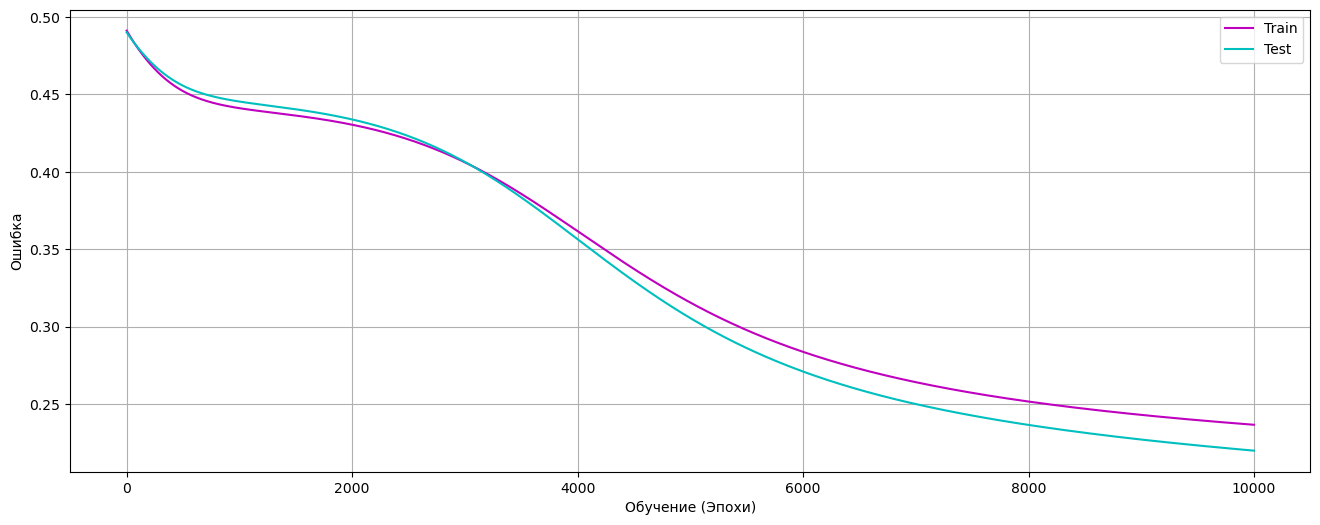

Точность нейронной сети на Train: 76.34%
Точность нейронной сети на Test: 78.02%


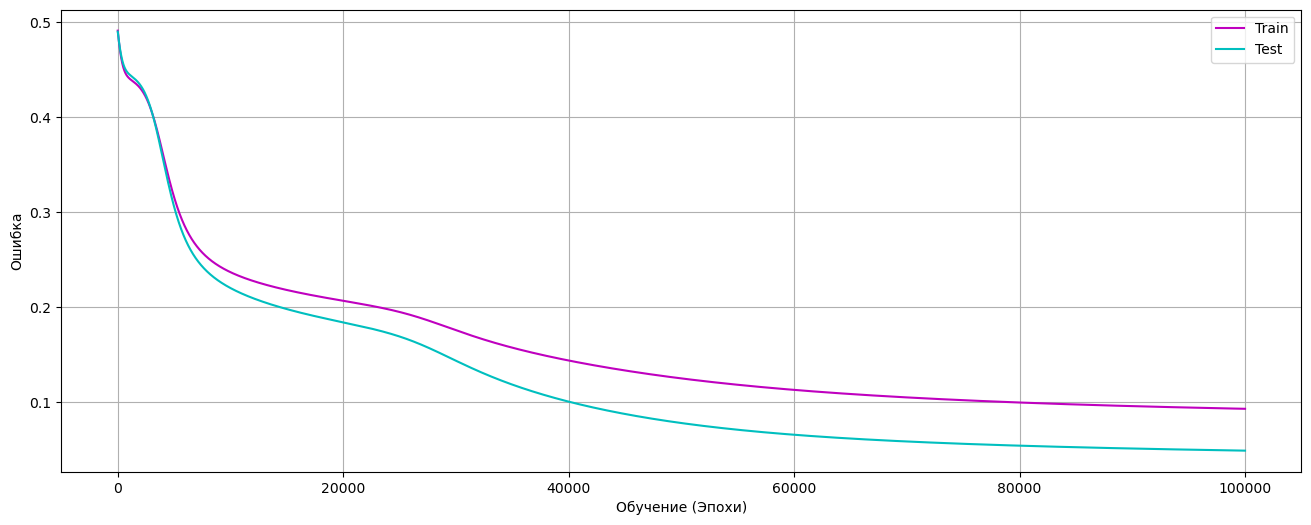

Точность нейронной сети на Train: 90.75%
Точность нейронной сети на Test: 95.16%


In [13]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=1000, eta=0.001, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.001, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=100000, eta=0.001, seed=1)

Увеличение количества эпох при $\eta=0.001$ (как в начальной нейронной сети) привело к улучшению качества сети, а уменьшение количества эпох привело к ухудшению качества модели.

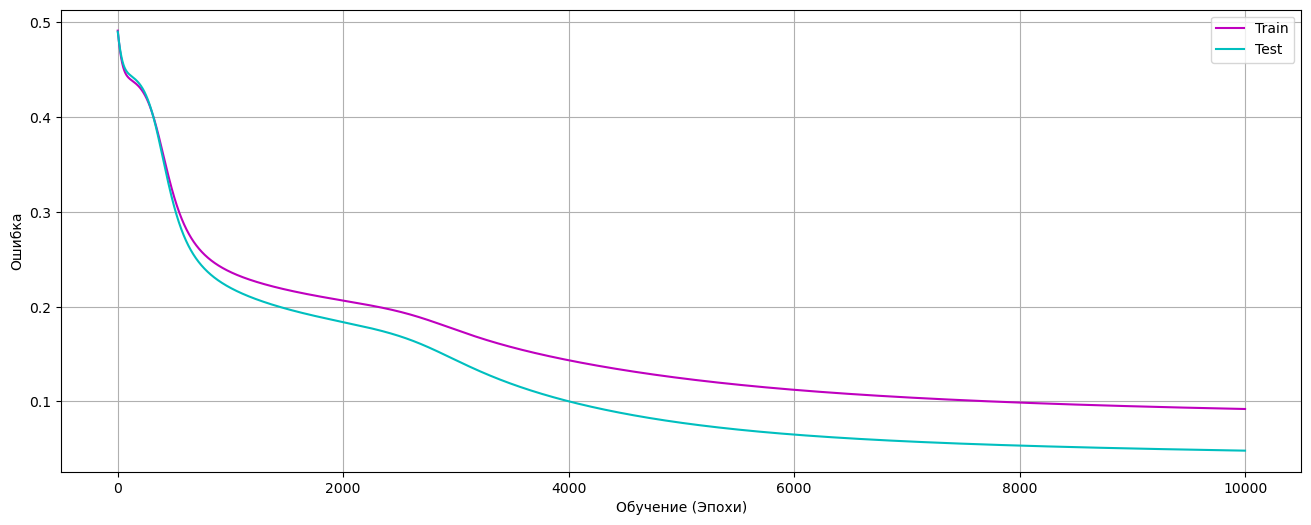

Точность нейронной сети на Train: 90.79%
Точность нейронной сети на Test: 95.19%


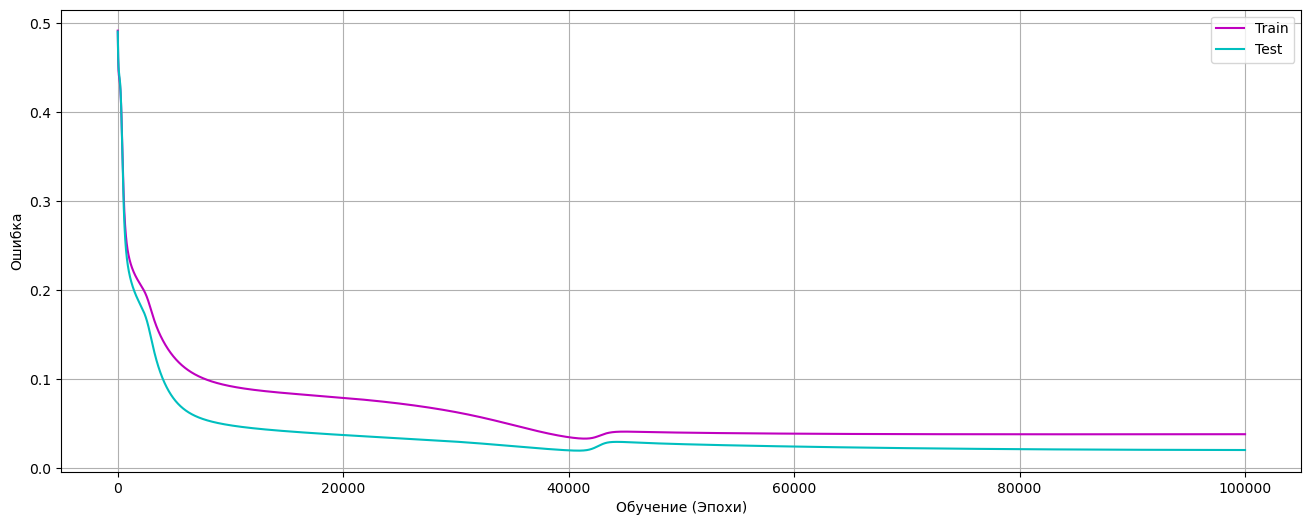

Точность нейронной сети на Train: 96.19%
Точность нейронной сети на Test: 97.96%


In [14]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.01, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=100000, eta=0.01, seed=1)

## 3. Изменение количества нейронов скрытого слоя

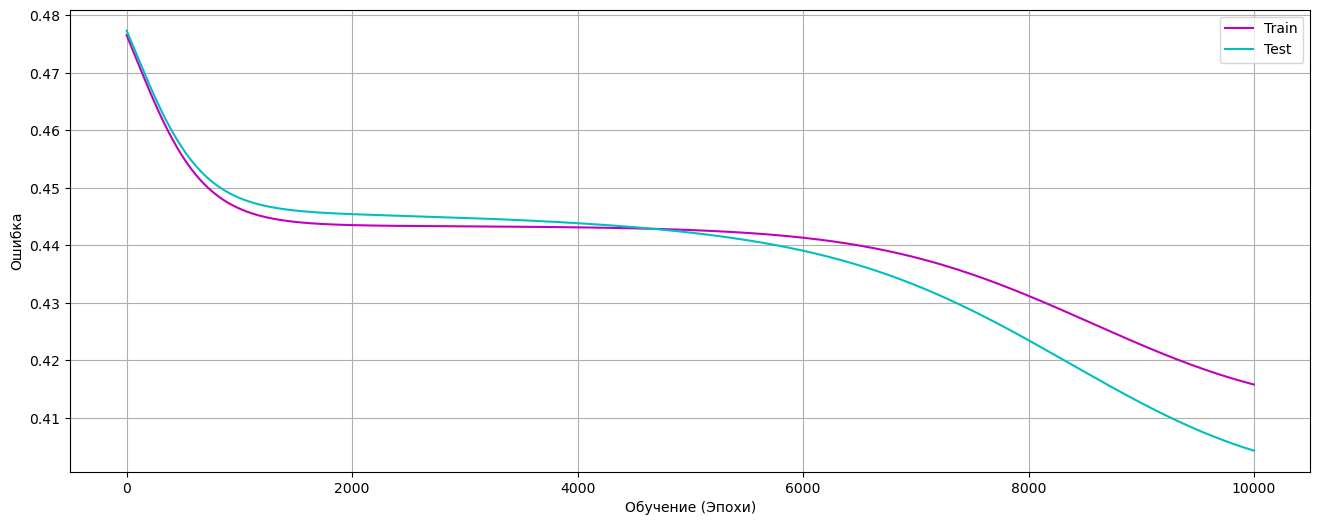

Точность нейронной сети на Train: 58.42%
Точность нейронной сети на Test: 59.57%


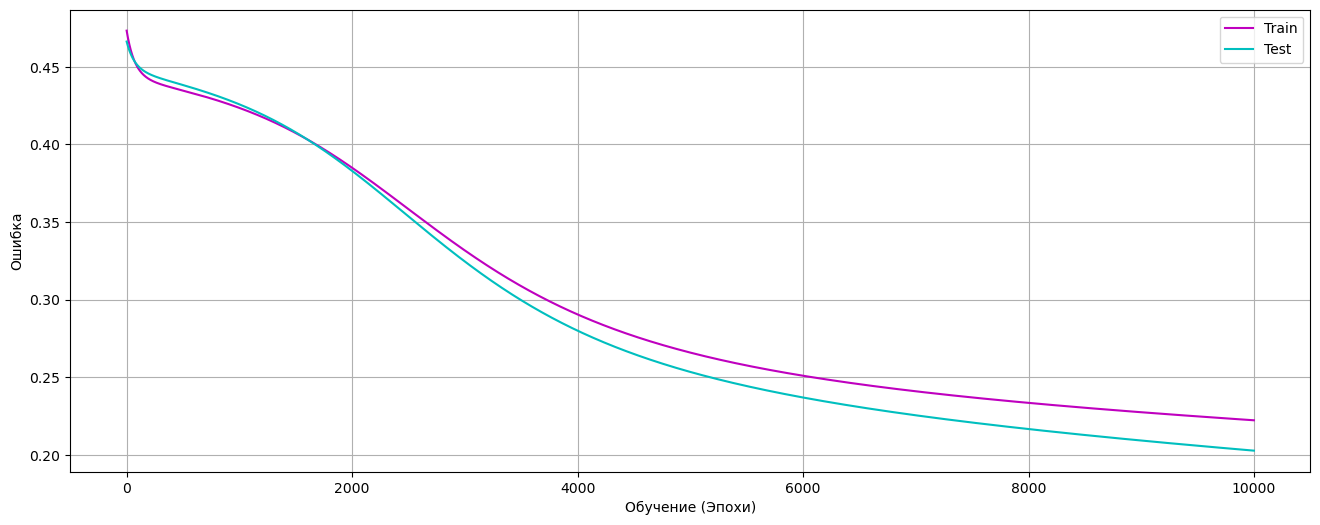

Точность нейронной сети на Train: 77.78%
Точность нейронной сети на Test: 79.73%


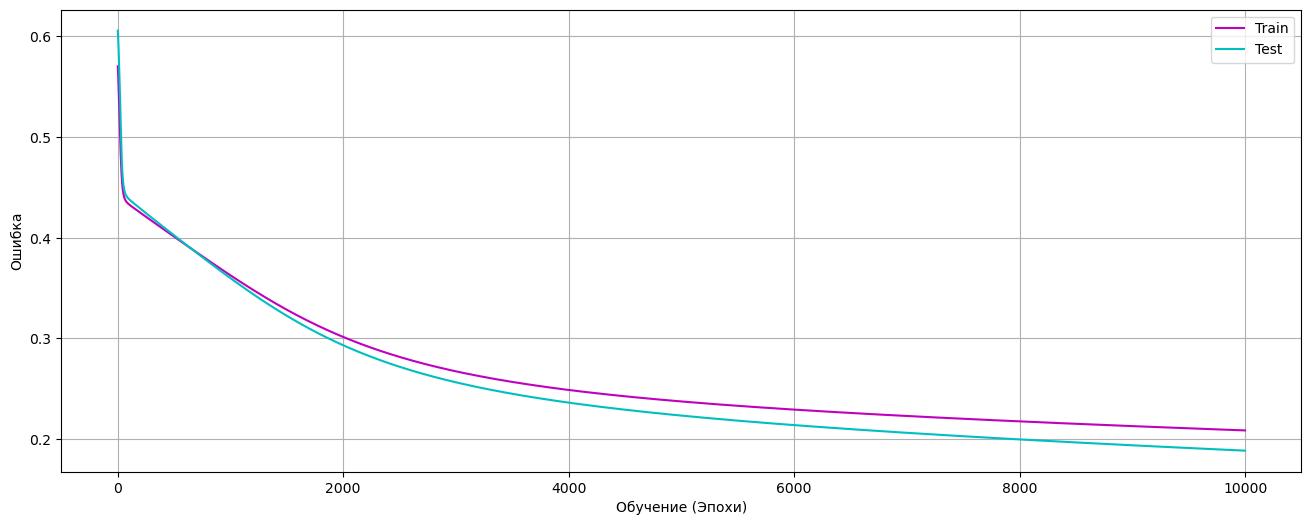

Точность нейронной сети на Train: 79.13%
Точность нейронной сети на Test: 81.14%


In [16]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=1, epochs_N=10000, eta=0.001, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=10, epochs_N=10000, eta=0.001, seed=1)
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=50, epochs_N=10000, eta=0.001, seed=1)

Увеличение количества нейронов с 3 до 10 незначительно улучшило качество нейронной сети. Видимо количество нейронов не сильно влияют на качество нашей начальной модели.

Однако, увеличение количества нейронов совместно с увеличением количества эпох довольно сильно улучшило нашу модель:

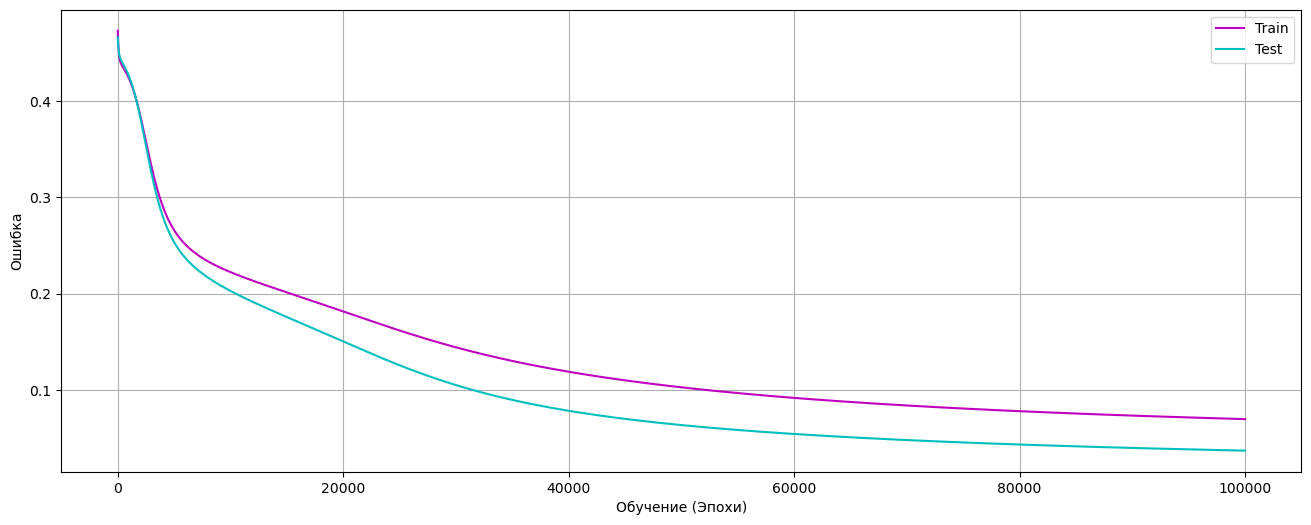

Точность нейронной сети на Train: 93.06%
Точность нейронной сети на Test: 96.34%


In [17]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=10, epochs_N=100000, eta=0.001, seed=1)

Правда и время обучения нашей модели также сильно увеличилось, что является минусом.

## 4. Изменение количества скрытых слоев до 3

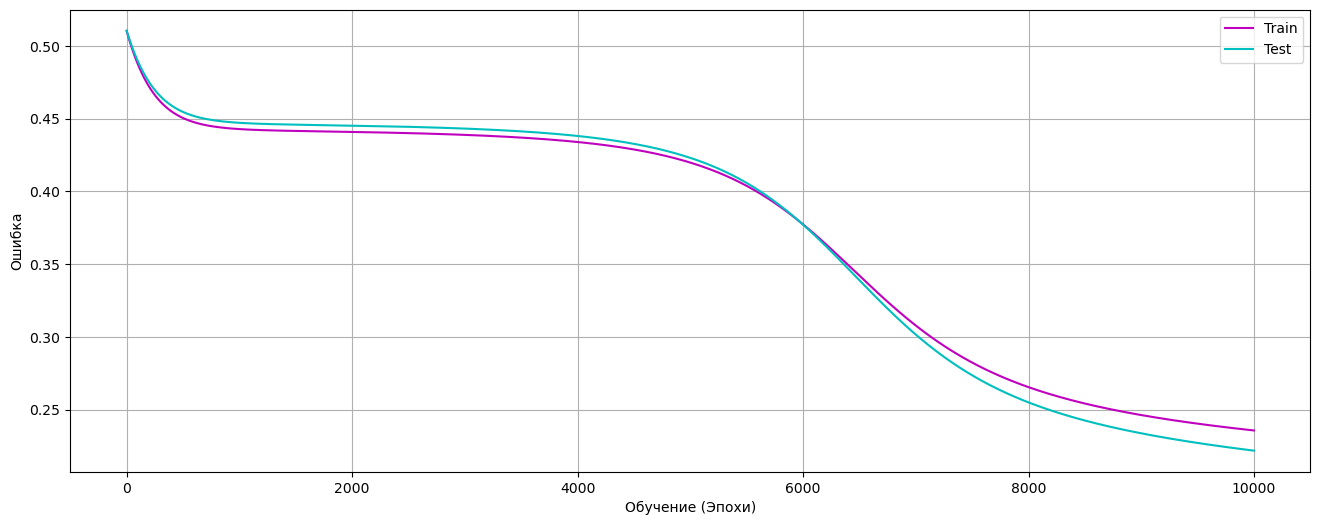

Точность нейронной сети на Train: 76.43%
Точность нейронной сети на Test: 77.82%


In [18]:
three_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=3, epochs_N=10000, eta=0.001, seed=1)

Добавив еще 1 слой, качество не сильно изменилось.

Попробуем сравнить 2х слойный перцептрон и 3х слойный перцептрон с другими параметрами:

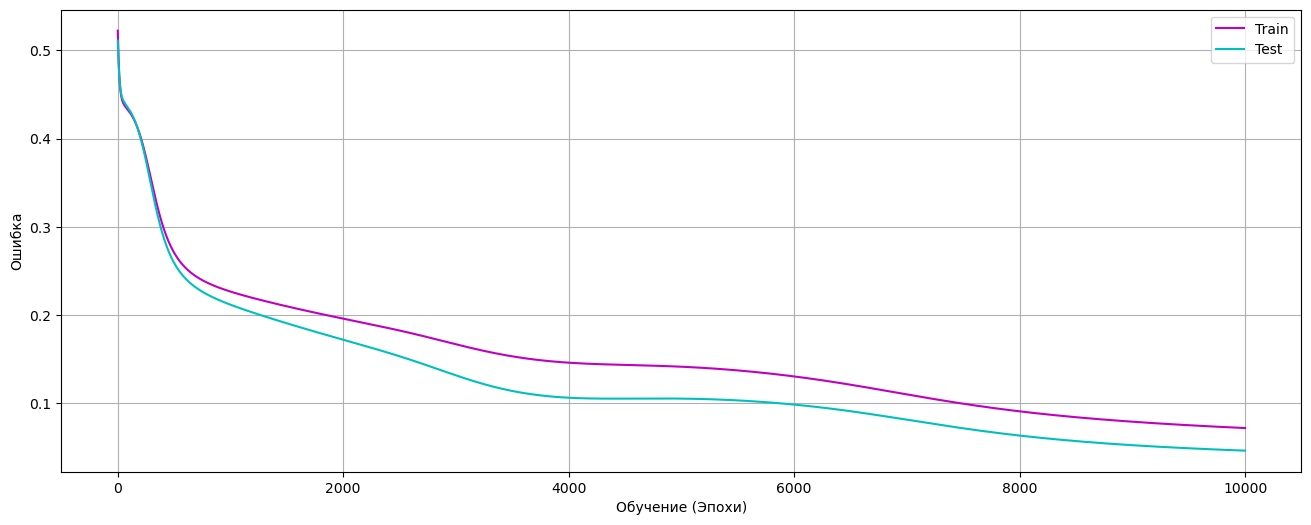

Точность нейронной сети на Train: 92.8%
Точность нейронной сети на Test: 95.36%


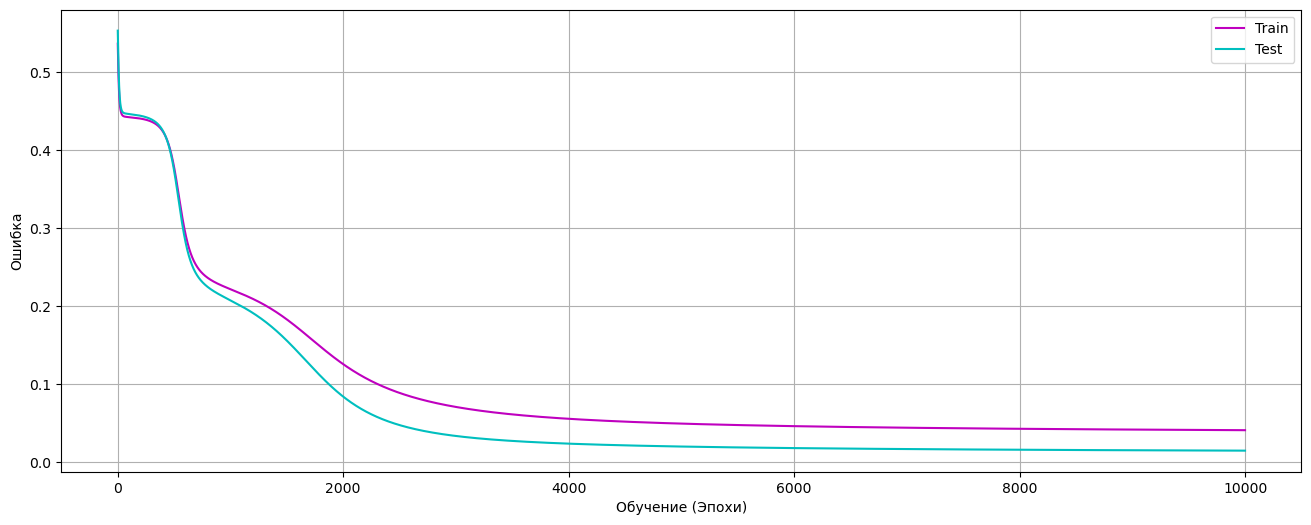

Точность нейронной сети на Train: 95.9%
Точность нейронной сети на Test: 98.53%


In [19]:
two_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=7, epochs_N=10000, eta=0.01, seed=1)
three_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=7, epochs_N=10000, eta=0.01, seed=1)

Как видим в данном примере, с переходом на 3х слойную модель качество улучшилось. Также можно отметить, что 3х слойной модели требуется намного меньше эпох, чтобы сойтись.

## 5. Лучшая подобранная модель

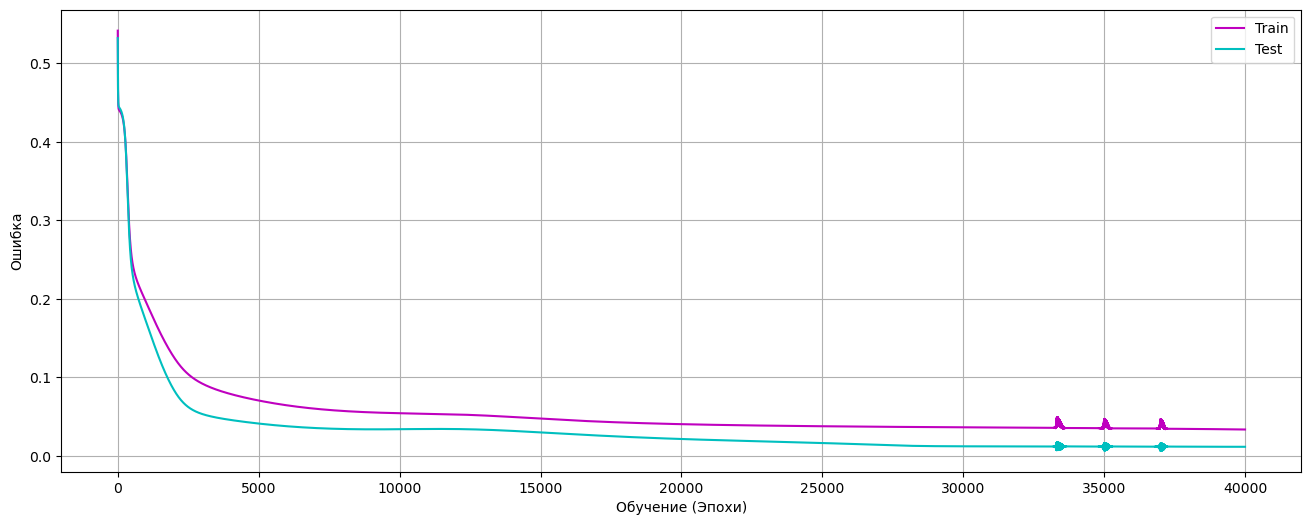

Точность нейронной сети на Train: 96.62%
Точность нейронной сети на Test: 98.82%


In [21]:
three_layers_perceptron(X_train, y_train, X_test, y_test, neurons_N=8, epochs_N=40000, eta=0.01, seed=1)

**Вывод:**

* **Эпохи:** Количество эпох должно быть оптимальным, если их мало - недообучение, если их слишком много - может возникнуть переобучение.
* **Скорость обучения:** Слишком маленькая скорость сильно замедляет обучение, однако поднимает точность модели. Слишком большая скорость обучения позволит быстрее обучать нашу сетку, но точность модели может понизиться.
* **Количество нейронов в скрытом слое:** На нашей модели уменьшение приводило к падению точности, а увеличение количества нейронов приводило к увеличению времени обучения и незначительному улучшению точности модели.
* **Количество слоев:** Приводит к уменьшению количества эпох, при которых потери выходят на "плато". С увеличением вроде бы помогает улучшить точность, но не понятно как количество слоев влияет на переобучение.

---